<a href="https://colab.research.google.com/github/Lulukia0704/Learn-Data-Mining/blob/main/tugas-pertama/tugashacktiv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Ganti path ini sesuai lokasi file kamu
file_path = '/content/drive/MyDrive/Capstone /Iris.csv'
df = pd.read_csv(file_path)

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
!find /content/drive -name "Iris.csv"


/content/drive/MyDrive/Capstone /Iris.csv


Membersihkan mengecek data & memproses data

In [ ]:
df.info()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
df = df.drop('Id', axis=1)

In [ ]:
X = df.drop('Species', axis=1)
y = df['Species']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Confusion Matrix & Visualisasi Decision Tree

Akurasi: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



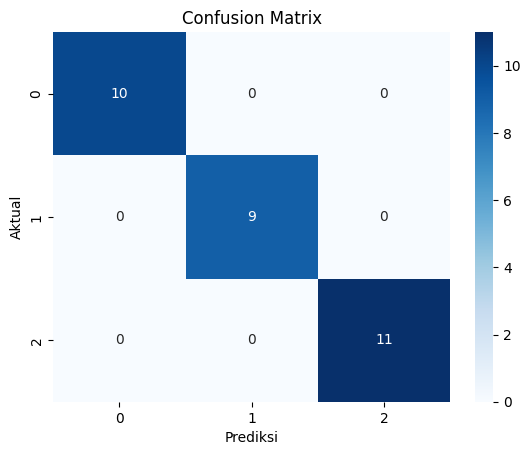

In [ ]:
y_pred = model.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix")
plt.show()

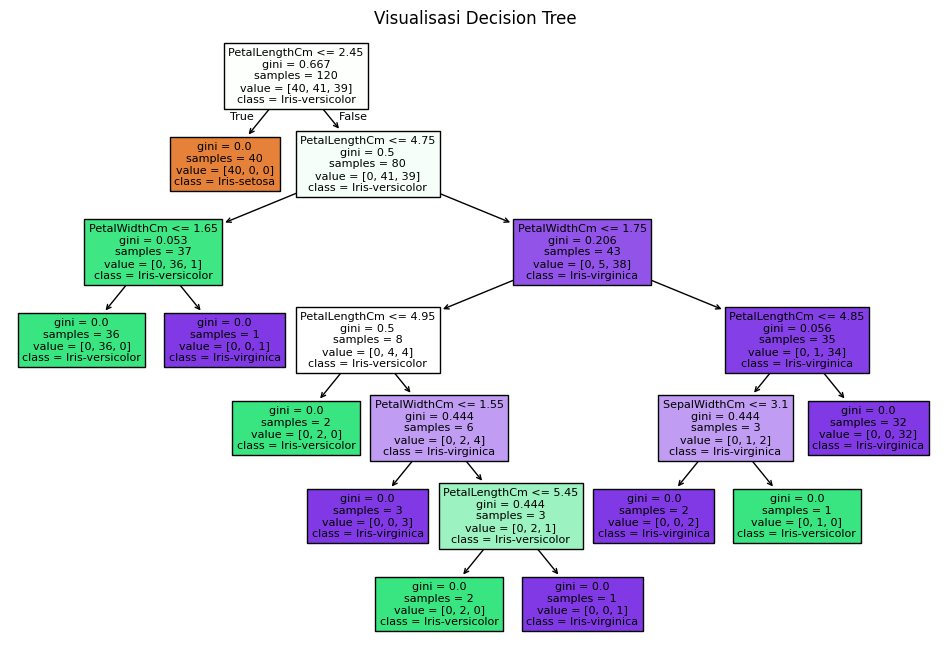

In [ ]:
plt.figure(figsize=(12,8))
plot_tree(model, feature_names=X.columns, class_names=le.classes_, filled=True)
plt.title("Visualisasi Decision Tree")
plt.show()

## Analytic Result

Model Decision Tree telah berhasil dilatih menggunakan dataset Iris. Hasil evaluasi model menunjukkan performa yang sangat baik.

- **Akurasi Model:** 100%
- **Classification Report:**
  - Precision, Recall, dan F1-score pada semua kelas (Setosa, Versicolor, Virginica) mencapai nilai sempurna (1.00)
- **Confusion Matrix:** Tidak ada kesalahan klasifikasi (semua prediksi benar)

---

## Insight & Findings

- Model decision tree mampu mengklasifikasikan data dengan sangat akurat tanpa kesalahan pada data uji.
- Fitur-fitur seperti **Petal Length** dan **Petal Width** sangat berkontribusi dalam pemisahan kelas.
- Model ini sangat cocok untuk masalah klasifikasi sederhana dengan fitur yang terpisah jelas seperti dataset Iris ini.

---

## Recommendation

- Walaupun hasil sangat sempurna, perlu pengujian lebih lanjut pada data **di luar dataset Iris** (real-world data) untuk memastikan model tidak overfitting.
- Disarankan mencoba algoritma lain (misalnya **Random Forest** atau **Support Vector Machine**) untuk perbandingan performa.
- Tambahkan fitur **visualisasi feature importance** agar pengguna bisa memahami fitur mana yang paling berpengaruh dalam pengambilan keputusan.
